# **Extensive Analysis + Visualization with Python**

**Heart disease** or **Cardiovascular disease (CVD)** is a class of diseases that involve the heart or blood vessels. Cardiovascular diseases are the leading cause of death globally. This is true in all areas of the world except Africa. Together CVD resulted in 17.9 million deaths (32.1%) in 2015.  Deaths, at a given age, from CVD are more common and have been increasing in much of the developing world, while rates have declined in most of the developed world since the 1970s.

So, in this kernel, I have conducted **Exploratory Data Analysis** or **EDA** of the heart disease dataset. **Exploratory Data Analysis** or **EDA** is a critical first step in analyzing a new dataset. The primary objective of EDA is to analyze the data for distribution, outliers and anomalies in the dataset. It enable us to direct specific testing of the hypothesis. It includes analysing the data to find the distribution of data, its main characteristics, identifying patterns and visualizations.  It also provides tools for hypothesis generation by visualizing and understanding the data through graphical representation.  


In [1]:
import numpy as np 
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\paruc\OneDrive\Desktop\DS\1. Nov\24th- Seaborn, Eda practicle\EDA\heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Univariate analysis

In [11]:
df['target'].nunique()

2

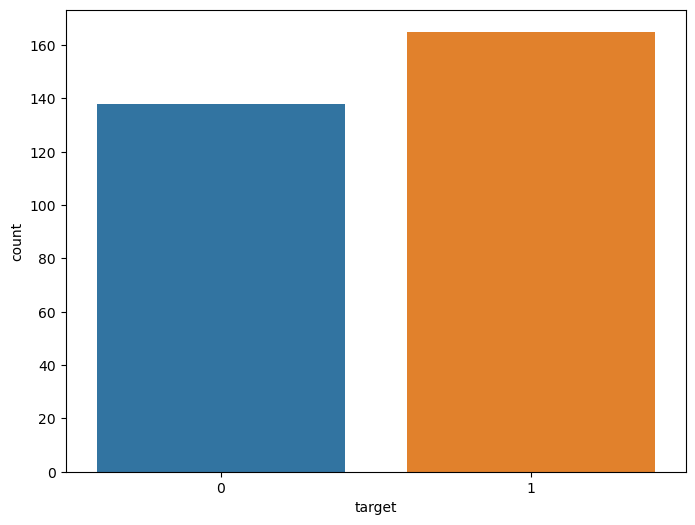

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df)
plt.show()

In [13]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

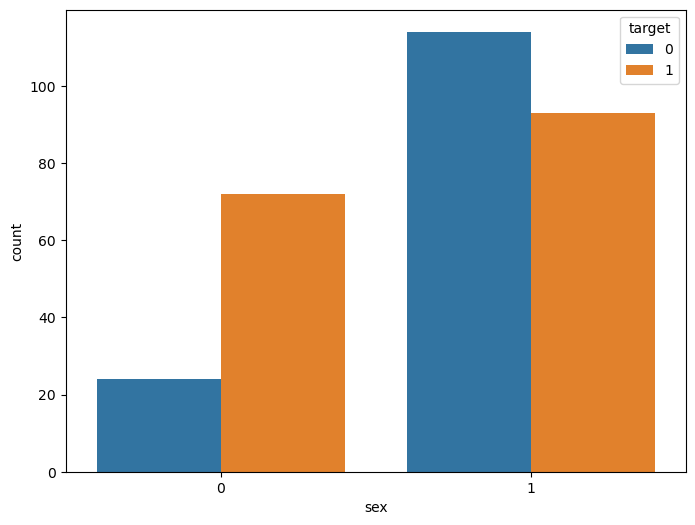

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.show()

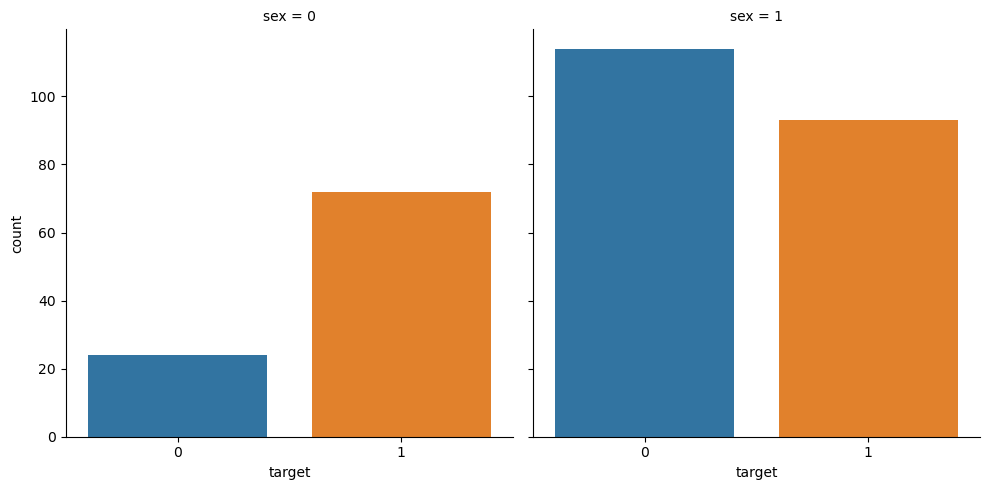

In [15]:
ax = sns.catplot(x="target", col="sex", data=df, kind="count", height=5, aspect=1)

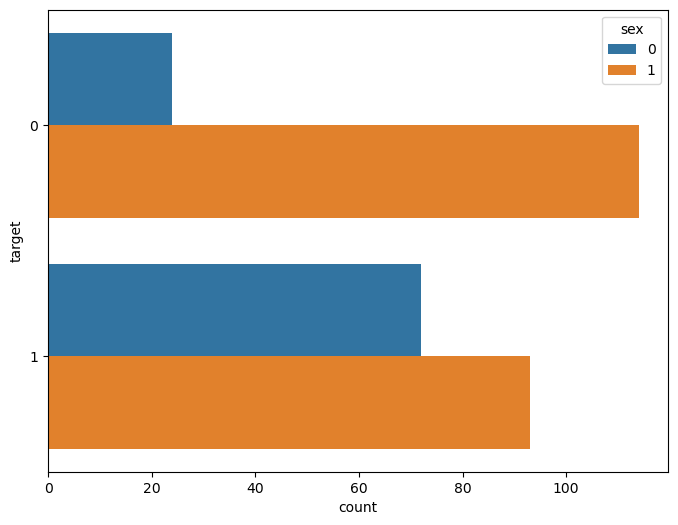

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="target", hue="sex", data=df)
plt.show()

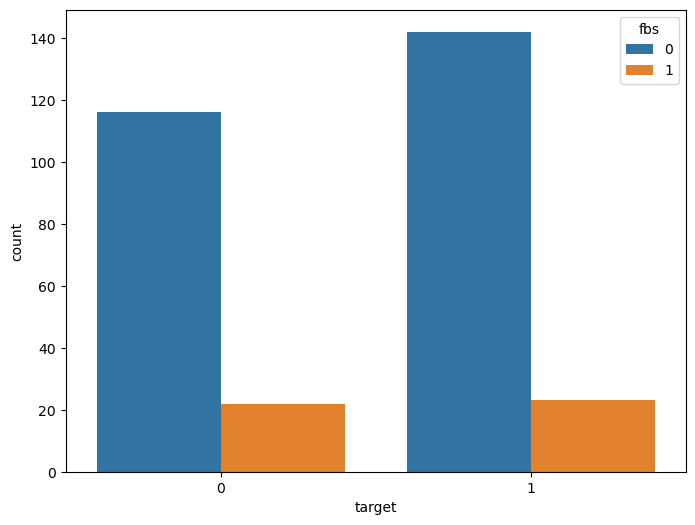

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="fbs", data=df)
plt.show()

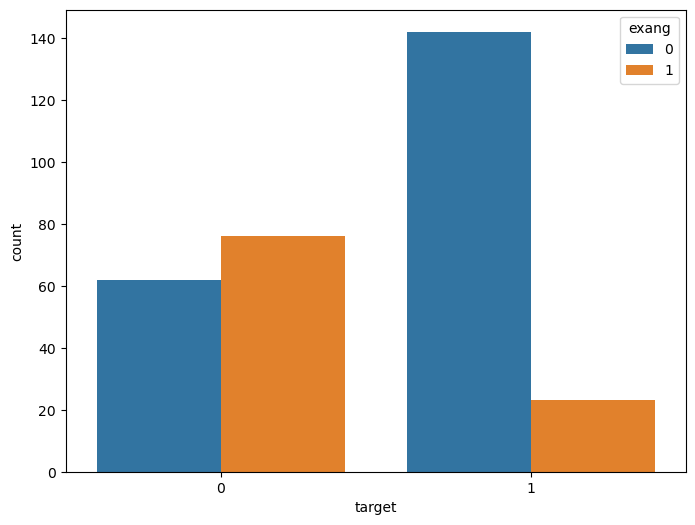

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exang", data=df)
plt.show()

# Bivariate Analysis 

In [19]:
correlation = df.corr()

<Axes: title={'center': 'Correlation Heatmap of Heart Disease Dataset'}>

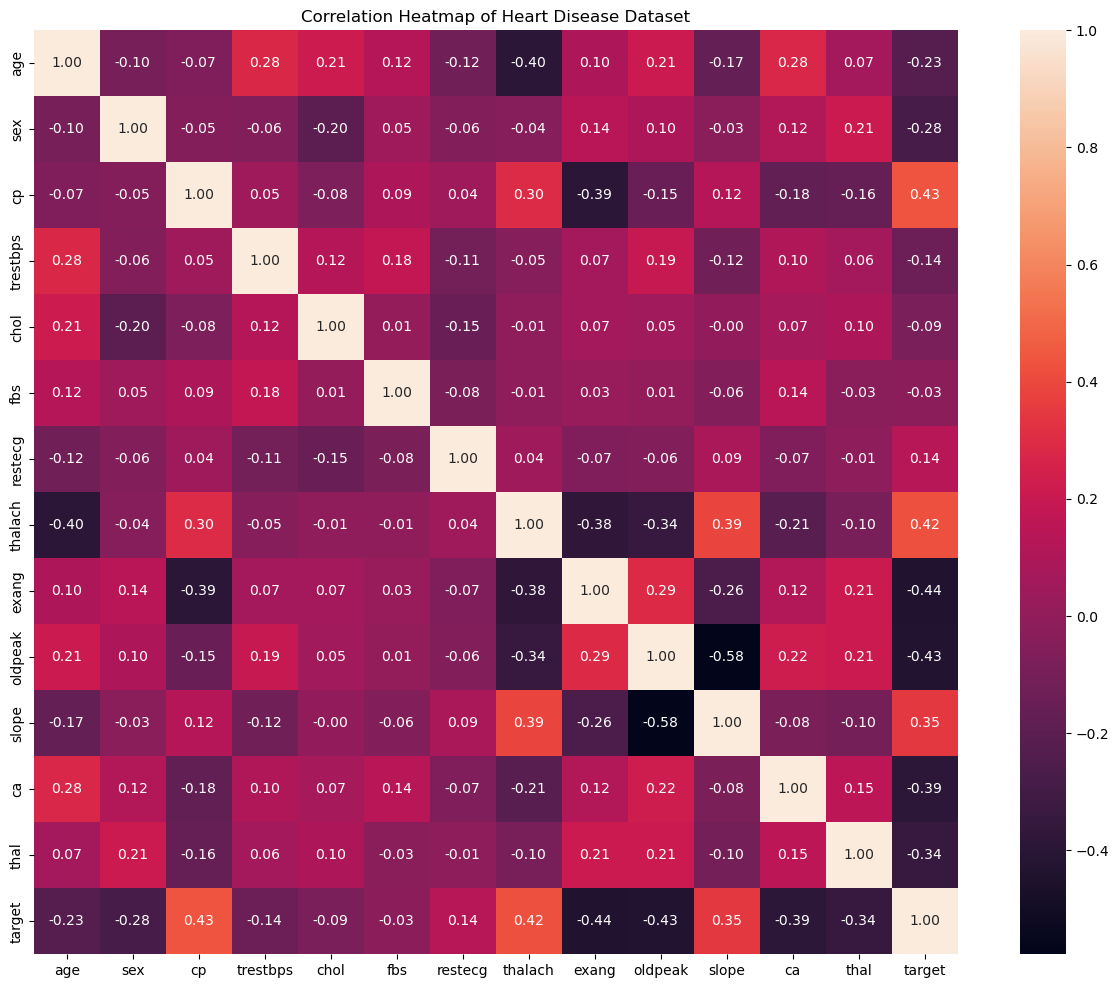

In [35]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
sns.heatmap(correlation,square=True, annot=True,fmt='.2f')

From the above correlation heat map, we can conclude that :-

- `target` and `cp` variable are mildly positively correlated (correlation coefficient = 0.43).

- `target` and `thalach` variable are also mildly positively correlated (correlation coefficient = 0.42).

- `target` and `slope` variable are weakly positively correlated (correlation coefficient = 0.35).

- `target` and `exang` variable are mildly negatively correlated (correlation coefficient = -0.44).

- `target` and `oldpeak` variable are also mildly negatively correlated (correlation coefficient = -0.43).

- `target` and `ca` variable are weakly negatively correlated (correlation coefficient = -0.39).

- `target` and `thal` variable are also waekly negatively correlated (correlation coefficient = -0.34).

From above Target variable is slightly correlated with cp and thalach

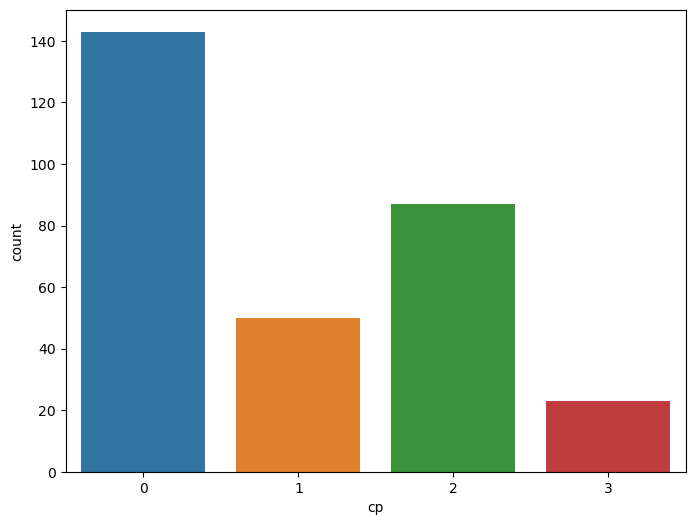

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", data=df)
plt.show()

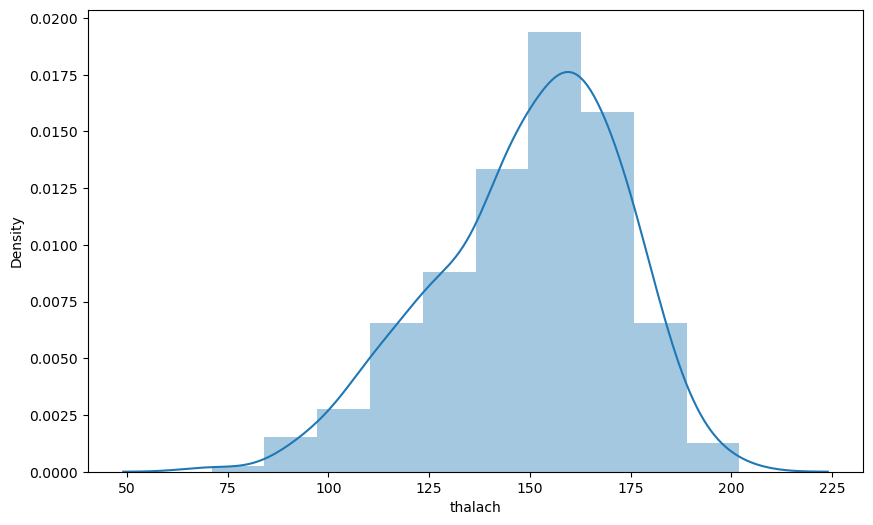

In [24]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, bins=10)
plt.show()

- We can see that the thalach variable is slightly negatively skewed.

### Seaborn Kernel Density Estimation (KDE) Plot

- The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.

- The KDE plot plots the density of observations on one axis with height along the other axis.

- We can plot a KDE plot as follows :

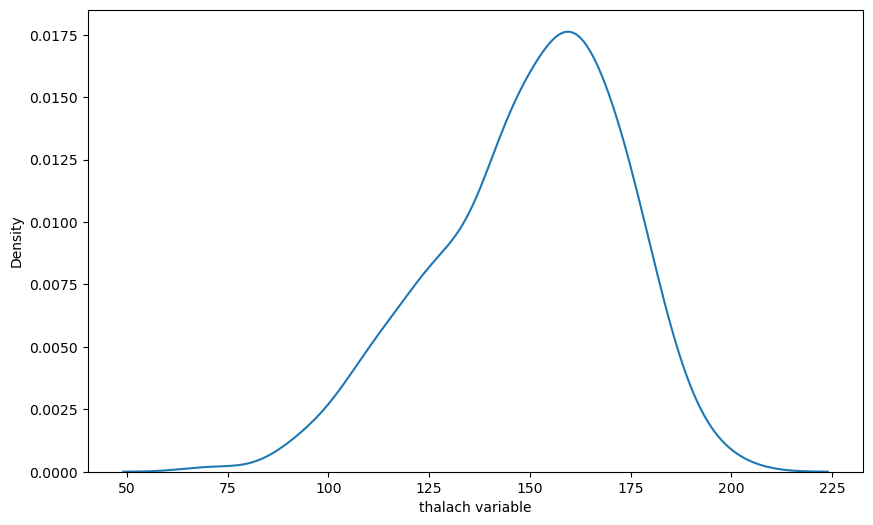

In [26]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x)
plt.show()

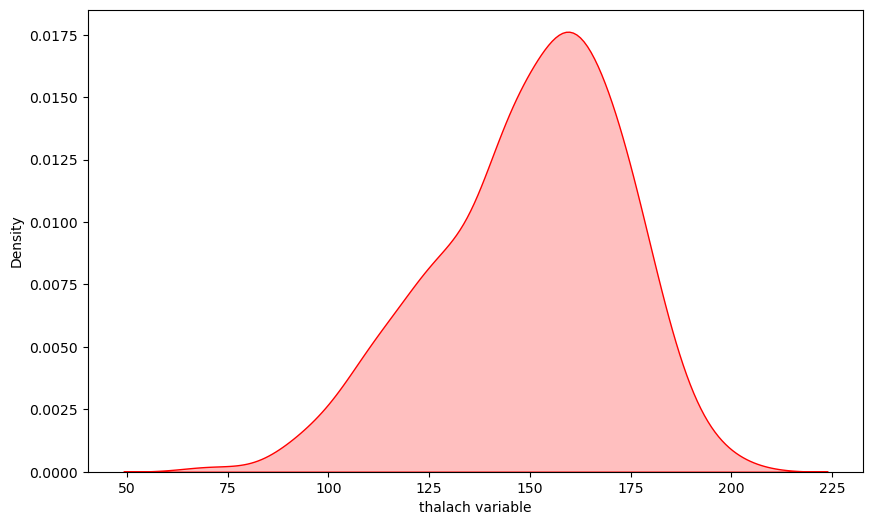

In [27]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

#### Histogram

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

- We can plot a histogram as follows :

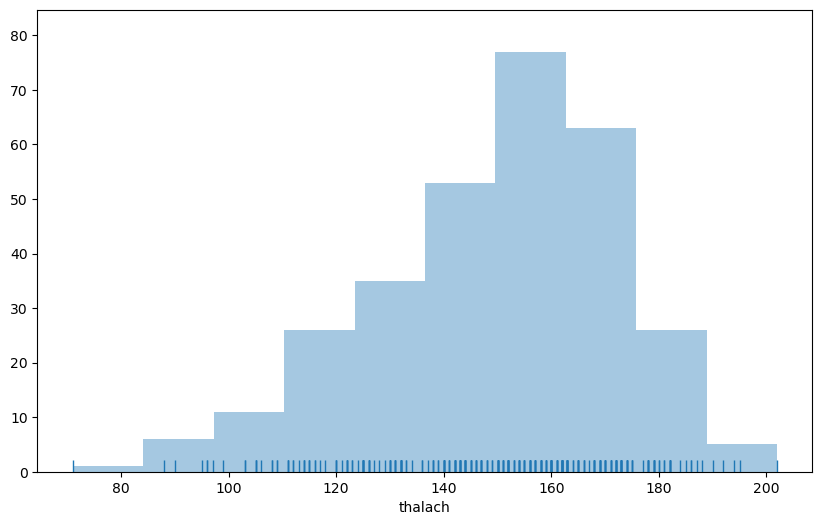

In [28]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

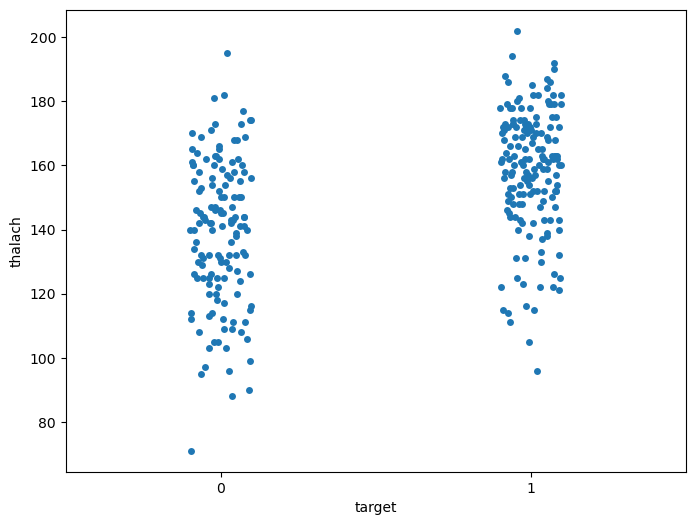

In [29]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df)
plt.show()

#### Interpretation

- We can see that those people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

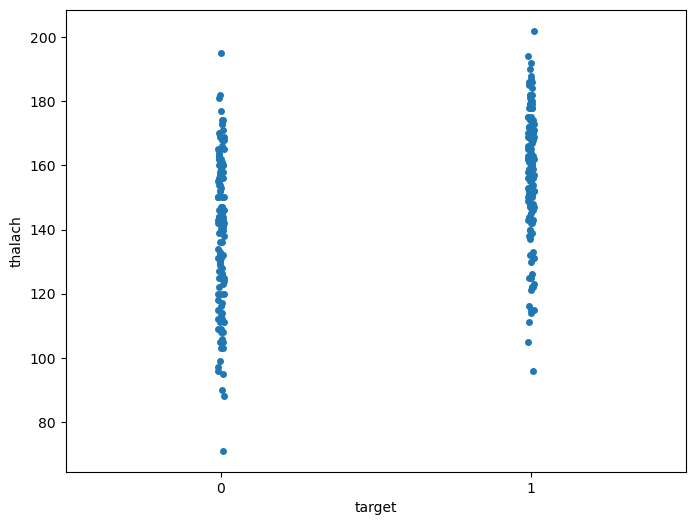

In [30]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df, jitter = 0.01)
plt.show()

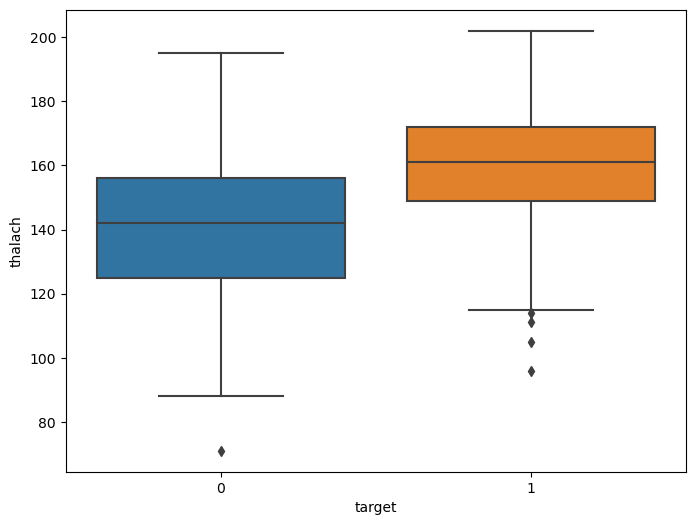

In [31]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.show()

# Multivariate analysis

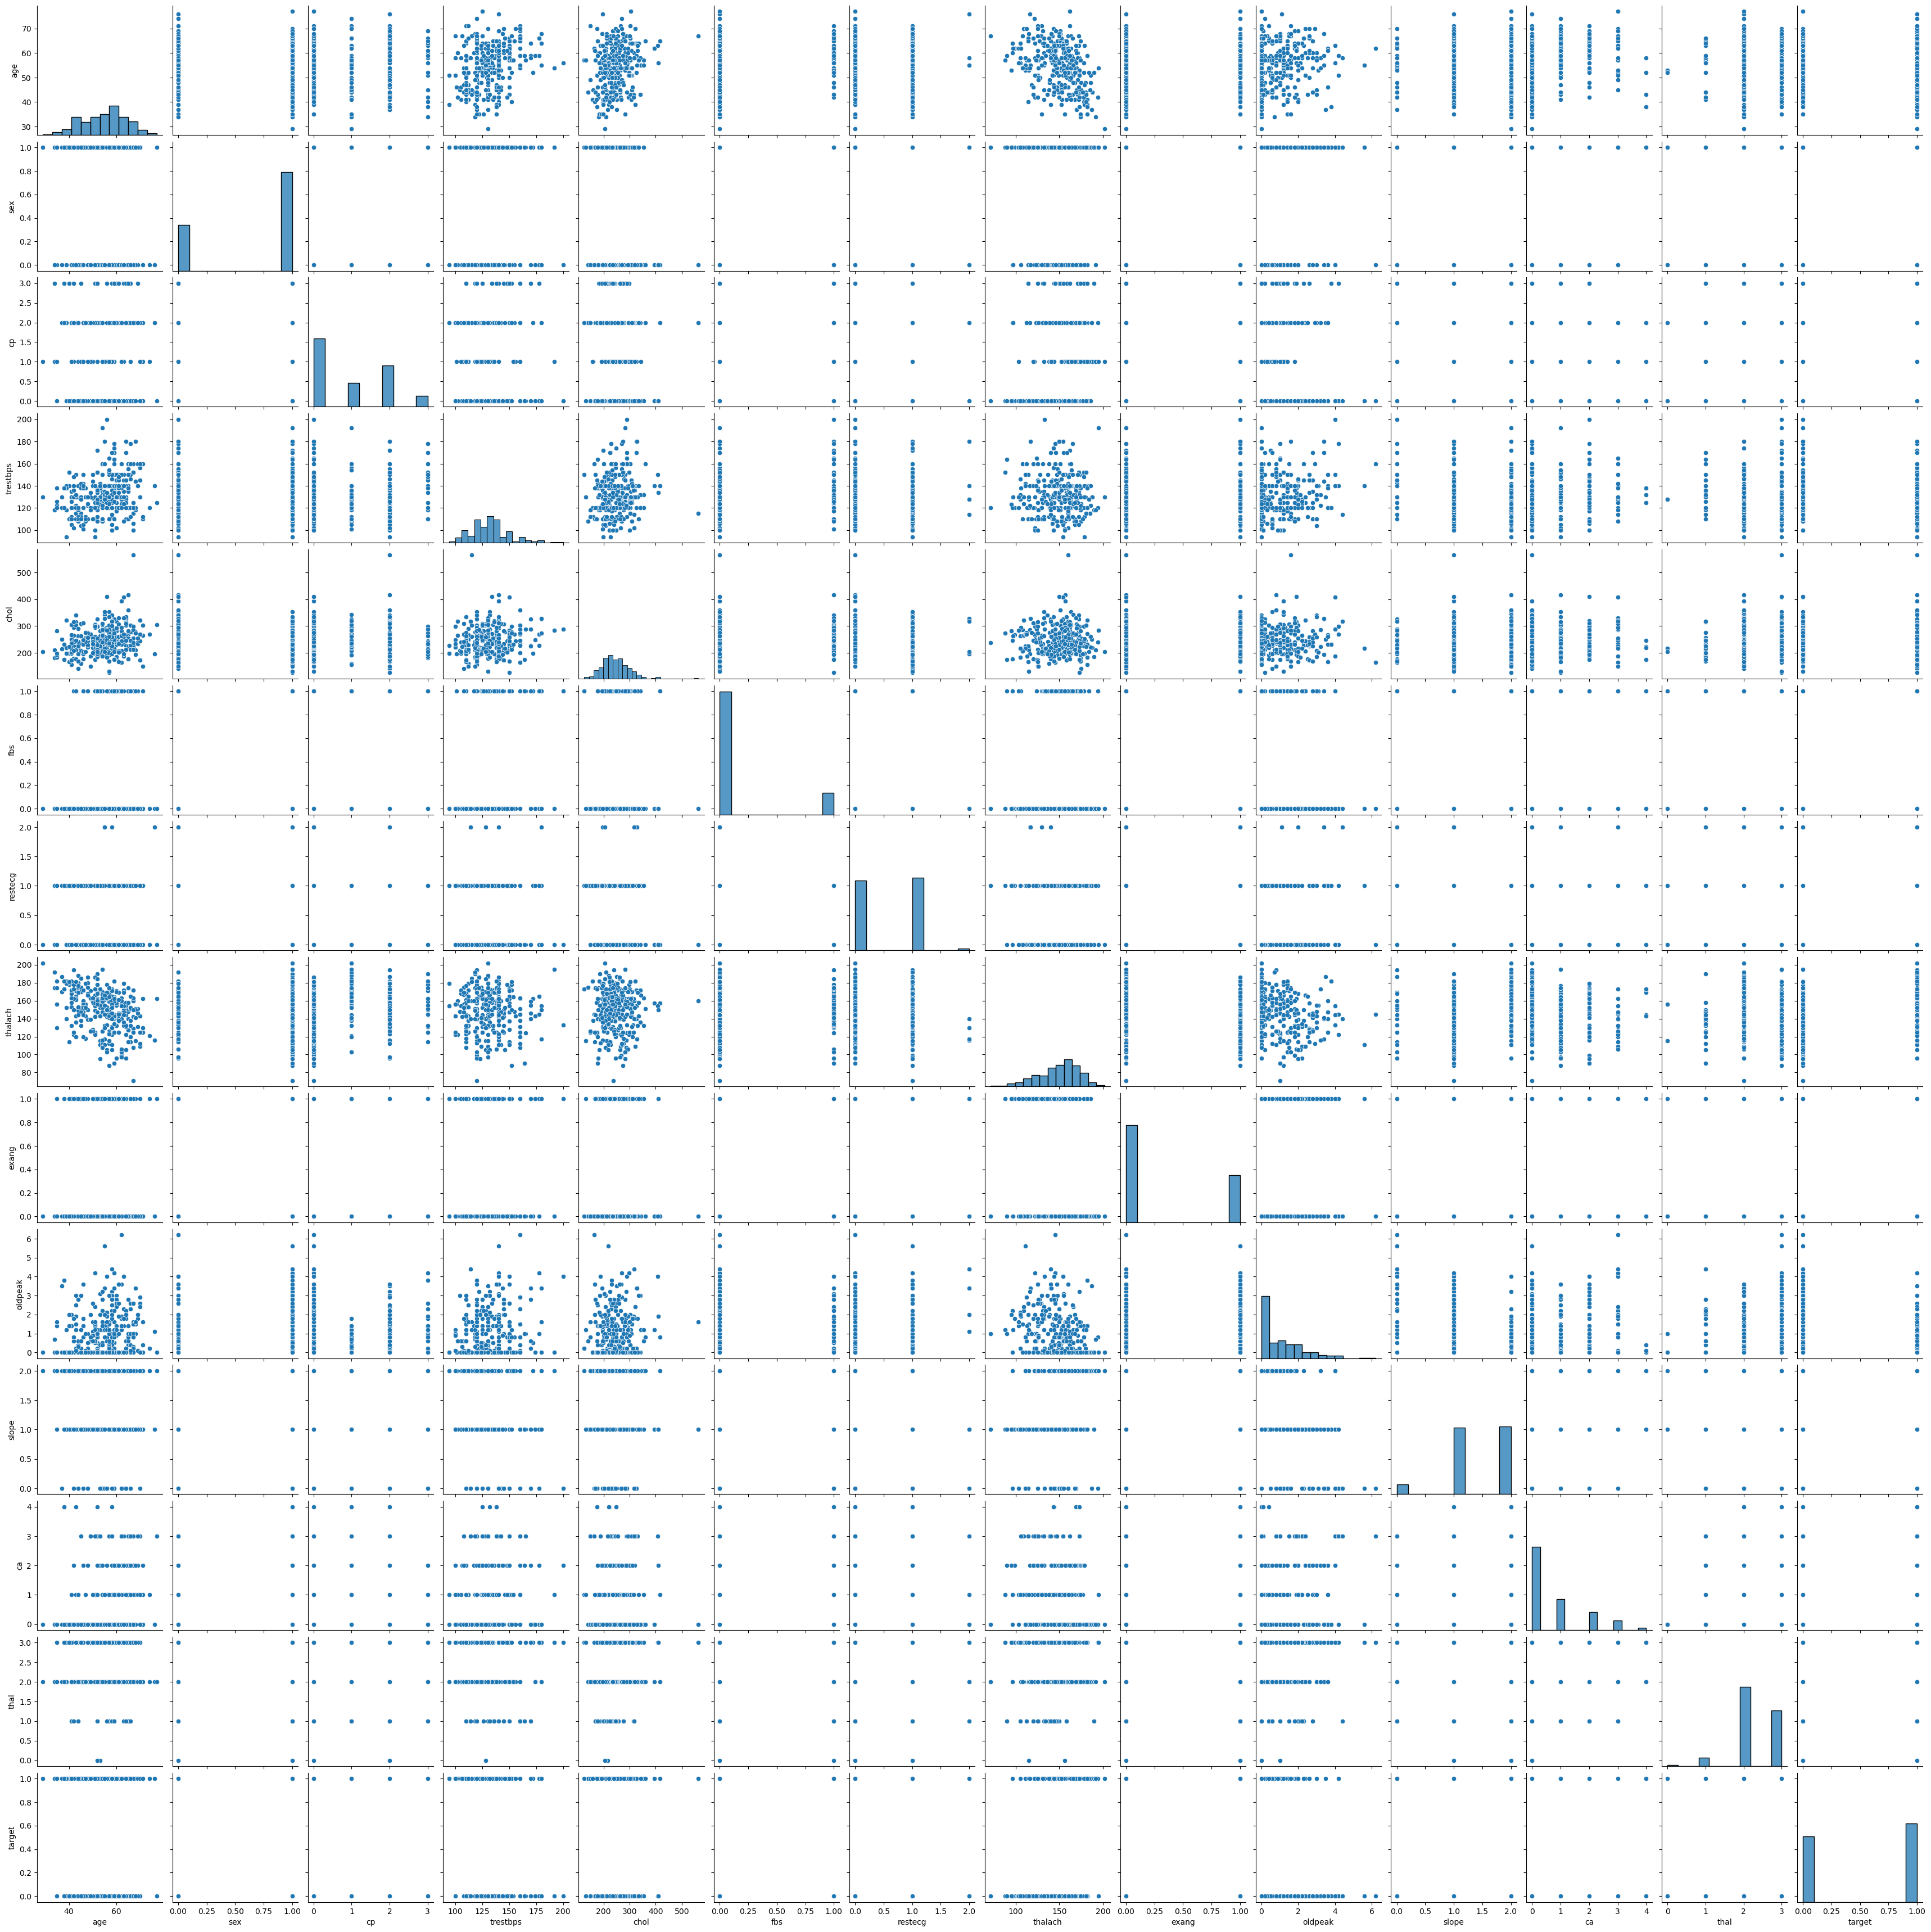

In [36]:
sns.pairplot(df)

In [37]:
df['age'].nunique()

41

In [38]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

#### Interpretation

- The mean value of the `age` variable is 54.37 years.

- The minimum and maximum values of `age` are 29 and 77 years.

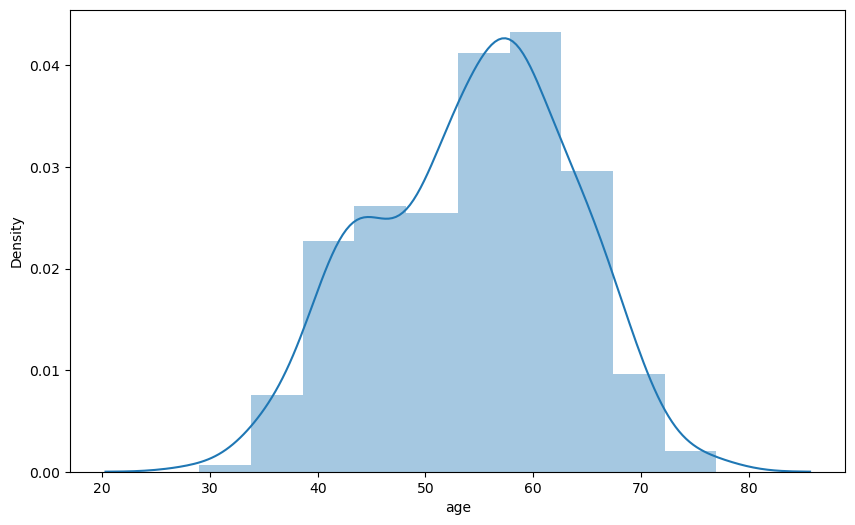

In [39]:
f, ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

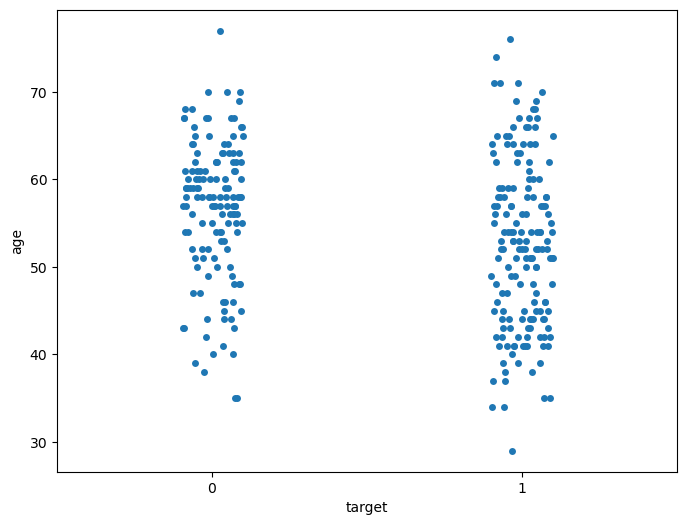

In [40]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="age", data=df)
plt.show()

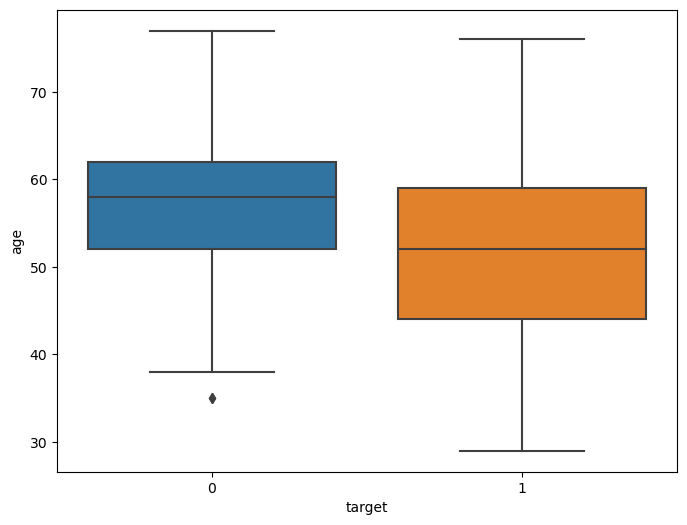

In [41]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.show()

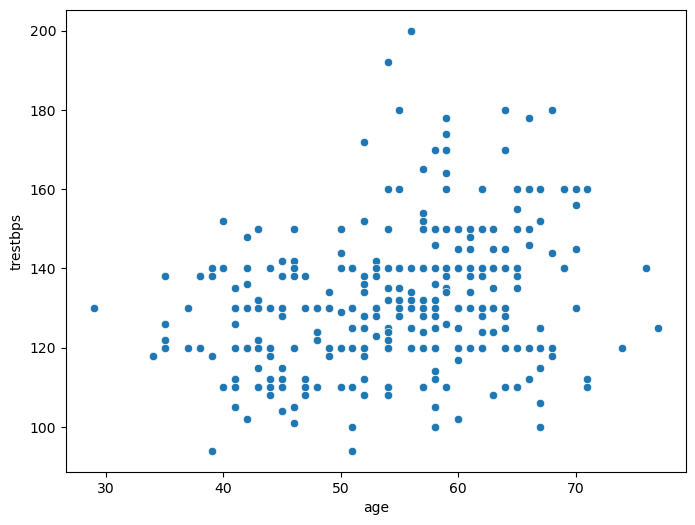

In [42]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="trestbps", data=df)
plt.show()

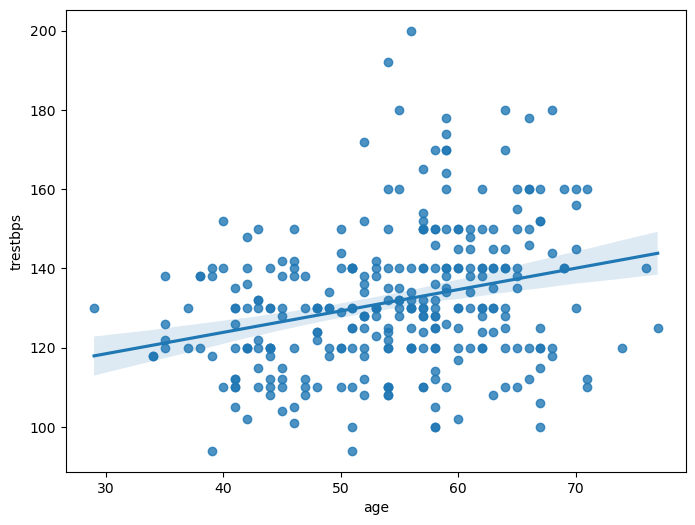

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.show()

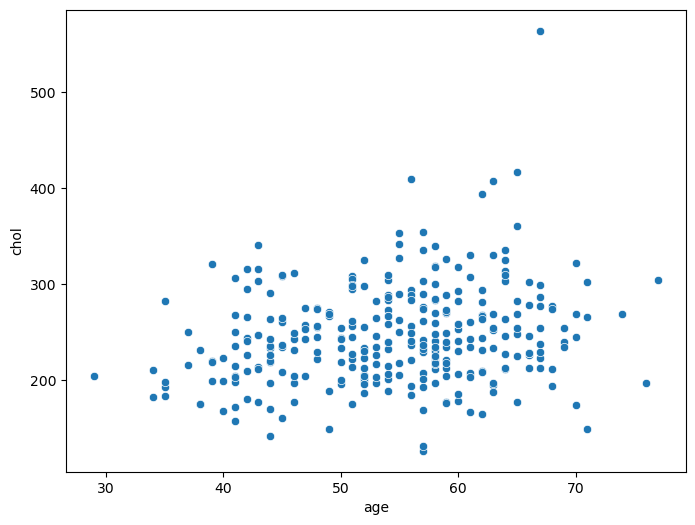

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=df)
plt.show()

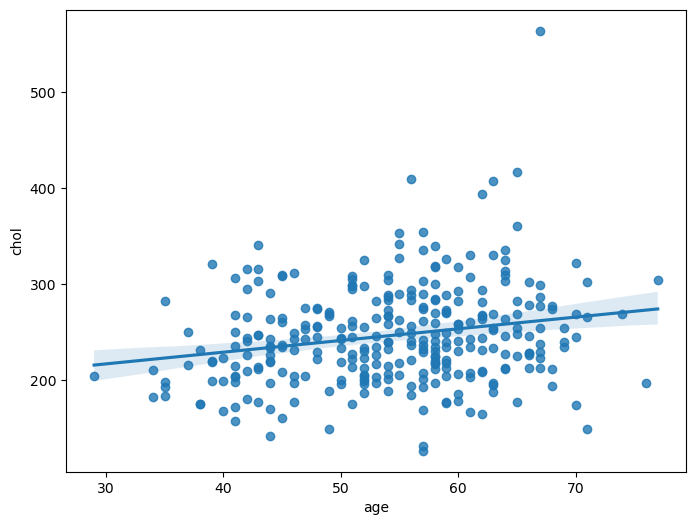

In [45]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.show()

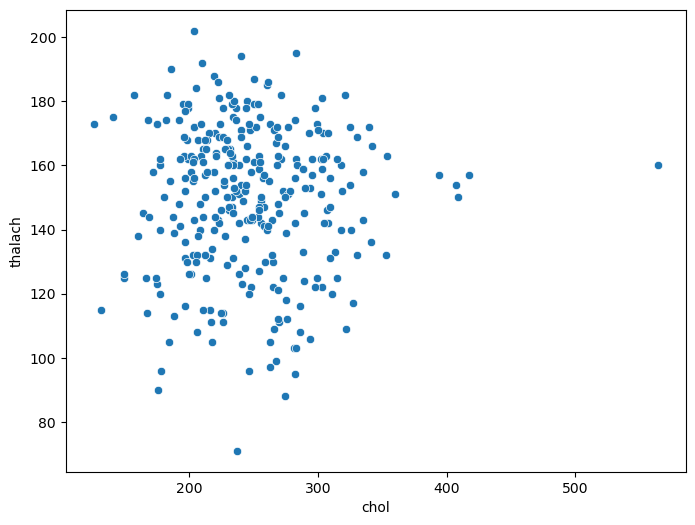

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="chol", y = "thalach", data=df)
plt.show()

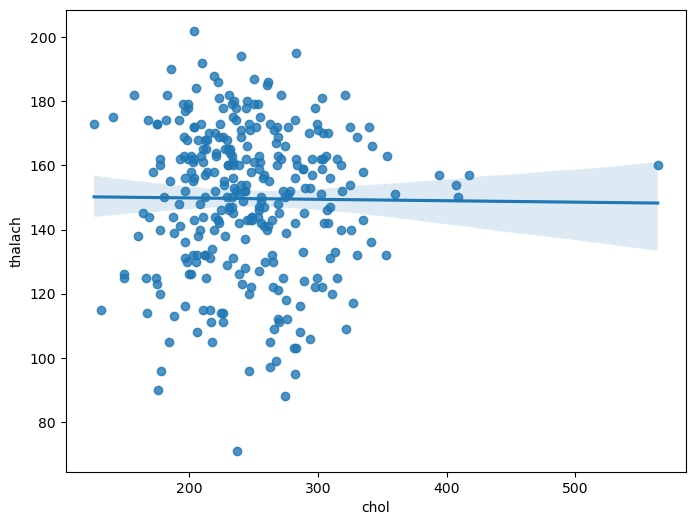

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.show()